# Exercise Set 5

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from math import comb
sns.set()

In [53]:
#load data in data_5
data1 = np.loadtxt("Data_5/0.2.txt")
data2 = np.loadtxt("Data_5/0.5.txt")
data3 = np.loadtxt("Data_5/0.8.txt")

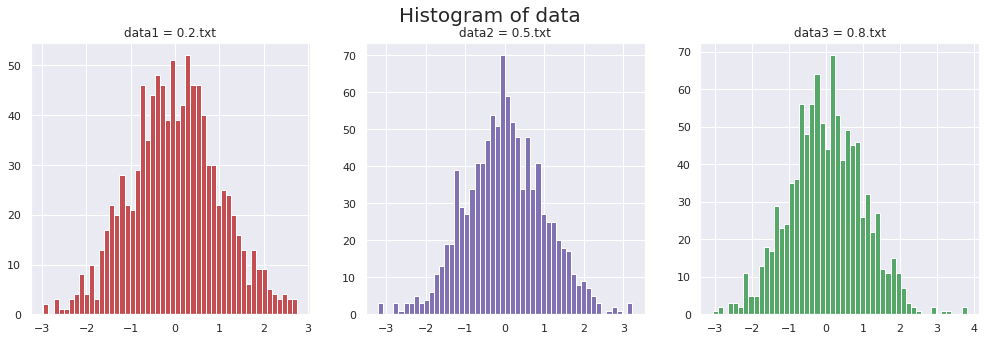

In [6]:
#plot the data
fig, axs = plt.subplots(1,3, figsize=(17,5))

axs[0].hist(data1, bins=50, color="r")
axs[0].set_title("data1 = 0.2.txt")

axs[1].hist(data2, bins=50, color="m")
axs[1].set_title("data2 = 0.5.txt")

axs[2].hist(data3, bins=50, color="g")
axs[2].set_title("data3 = 0.8.txt")

fig.suptitle("Histogram of data", fontsize=20)
plt.show()

# Q1:

In [4]:
n_m = [1, 2, 3, 4, 5, 10]
n_k = [1, 2, 3, 4, 5, 6, 10]

In [81]:
def moment(x,k):
    """calculate kth central moment of x data

    Args:
        x (array_like): data
        k (int): order of central moment

    Returns:
        float: k-th central moment
    """
    return np.mean((x)**k)

In [82]:
def cumulant(x, k, M):  
    """calculate kth cumulant of x data

    Args:
        x (array_like): data
        k (int): order of cumulant

    Returns:
        float: k-th cumulant
    """
    K = np.zeros((k,k))
    for n in range(1,k+1):
        K[n-1, 0] = M(x,n) 
        for i in range(1, n):
            K[n-1, i] = comb(n-1, n-i) * M(x,n-i)
        if n != k:
            K[n-1, n] = 1

    return  ((-1)**(k-1)) * np.linalg.det(K)



In [18]:
Moment1, Moment2, Moment3 = [], [], []
for n in n_m:
    Moment1.append(moment(data1, n))
    Moment2.append(moment(data2, n))
    Moment3.append(moment(data3, n))

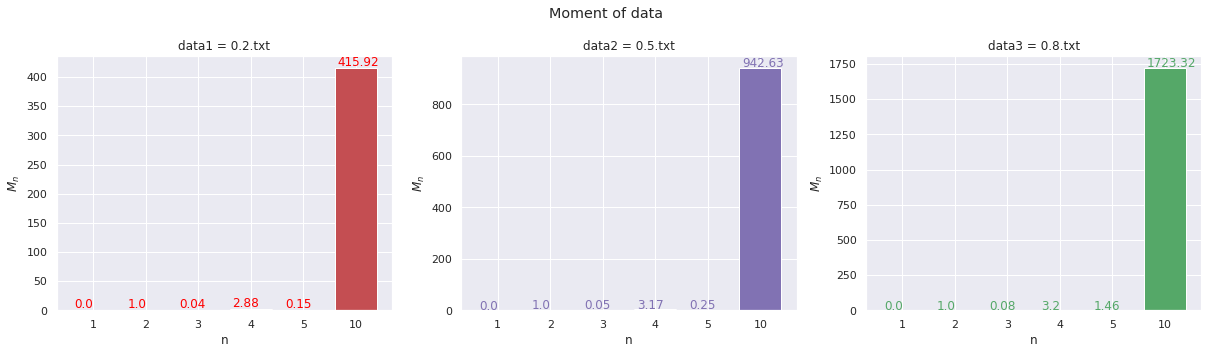

In [106]:
fig, axs = plt.subplots(1,3, figsize=(17,5))

axs[0].bar([str(i) for i in n_m], Moment1, color="r")
axs[0].set_title("data1 = 0.2.txt")
axs[0].set_xlabel("n")
axs[0].set_ylabel(r"$M_n$")
for i, v in enumerate(Moment1):
    axs[0].text(i-.35,v+4, str(round(v,2)), color='red')

axs[1].bar([str(i) for i in n_m], Moment2, color="m")
axs[1].set_title("data2 = 0.5.txt")
axs[1].set_xlabel("n")
axs[1].set_ylabel(r"$M_n$")
for i, v in enumerate(Moment2):
    axs[1].text(i-.35,v+4, str(round(v,2)), color='m')

axs[2].bar([str(i) for i in n_m], Moment3, color="g")
axs[2].set_title("data3 = 0.8.txt")
axs[2].set_xlabel("n")
axs[2].set_ylabel(r"$M_n$")
for i, v in enumerate(Moment3):
    axs[2].text(i-.35,v+4, str(round(v,2)), color='g')

fig.suptitle("Moment of data")
plt.tight_layout()
plt.show()

In [63]:
Cumulant1, Cumulant2, Cumulant3 = [], [], []
for n in n_k:
    Cumulant1.append(cumulant(data1, n, moment))
    Cumulant2.append(cumulant(data2, n, moment))
    Cumulant3.append(cumulant(data3, n, moment))

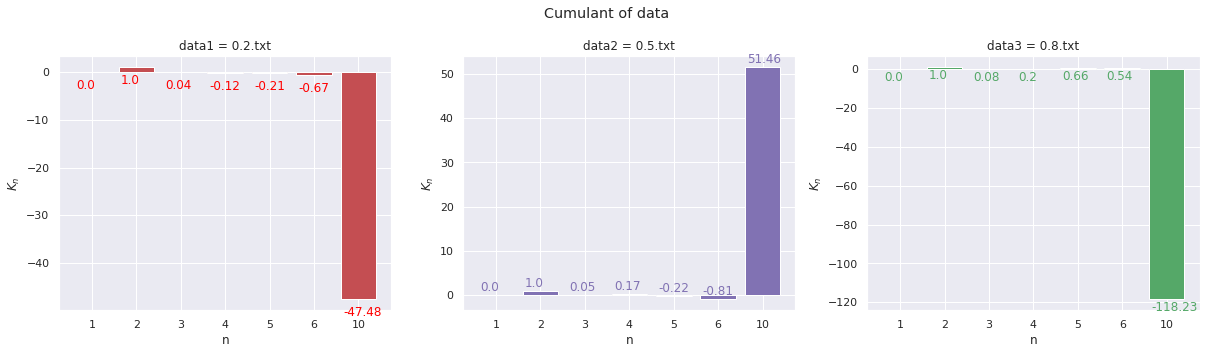

In [116]:
fig, axs = plt.subplots(1,3, figsize=(17,5))

axs[0].bar([str(i) for i in n_k], Cumulant1, color="r")
axs[0].set_title("data1 = 0.2.txt")
axs[0].set_xlabel("n")
axs[0].set_ylabel(r"$K_n$")

for i, v in enumerate(Cumulant1):
    axs[0].text(i-.35,v-3.5, str(round(v,2)), color='red')
    
axs[1].bar([str(i) for i in n_k], Cumulant2, color="m")
axs[1].set_title("data2 = 0.5.txt")
axs[1].set_xlabel("n")
axs[1].set_ylabel(r"$K_n$")
for i, v in enumerate(Cumulant2):
    axs[1].text(i-.35,v+1, str(round(v,2)), color='m')

axs[2].bar([str(i) for i in n_k], Cumulant3, color="g")
axs[2].set_title("data3 = 0.8.txt")
axs[2].set_xlabel("n")
axs[2].set_ylabel(r"$K_n$")
for i, v in enumerate(Cumulant3):
    axs[2].text(i-.35,v-6, str(round(v,2)), color='g')

fig.suptitle("Cumulant of data")
plt.tight_layout()
plt.show()

# Q2:

In [83]:
def skewness(x):
    """calculate skewness of data

    Args:
        x (array_like): data

    Returns:
        float: skewness of data
    """
    return np.mean((x-x.mean())**3)

In [84]:
def kurtosis(x):
    """calculate kurtosis of data

    Args:
        x (array_like): data

    Returns:
        float: kurtosis of data
    """
    m1 = x.mean()
    m2 = np.mean(x**2)
    m3 = np.mean(x**3)
    m4 = np.mean(x**4)
    kurt = m4 - 4* m3*m1 - 3 * m2**2 + 12 * m2 * m1 - 6* m1**4
    return kurt

In [85]:
print("The skewness of data 1 is", skewness(data1))
print("The skewness of data 2 is", skewness(data2))
print("The skewness of data 3 is", skewness(data3))

The skewness of data 1 is 0.03562410826680136
The skewness of data 2 is 0.04754127376432882
The skewness of data 3 is 0.08001875525507664


In [86]:
print("The kurtosis of data 1 is", kurtosis(data1))
print("The kurtosis of data 2 is", kurtosis(data2))
print("The kurtosis of data 3 is", kurtosis(data3))

The kurtosis of data 1 is -0.11911202437002512
The kurtosis of data 2 is 0.16745108121629032
The kurtosis of data 3 is 0.20486966786337443


# Q3:

In [24]:
data = np.loadtxt("0.800")
data

array([[ 1.00000000e+00,  1.02577223e-01],
       [ 2.00000000e+00, -8.85575575e-01],
       [ 3.00000000e+00, -9.97431011e-01],
       ...,
       [ 6.55340000e+04, -6.02874431e-01],
       [ 6.55350000e+04,  5.36658614e-02],
       [ 6.55360000e+04,  9.21246424e-01]])

# Q4:

In [71]:
def GenerateNormal():
  """generate normal distribution from unifor with BoX Muller algorithm

  Returns:
      float: random variable with normal distiribution
  """
  u1, u2 = np.random.uniform(0, 1, 2)
  z1 = ((-2*np.log(u1))**(0.5))* np.cos(2*np.pi*u2)
  z2 = ((-2*np.log(u2))**(0.5))* np.sin(2*np.pi*u1)
  return z1,z2

In [72]:
normal = []
for i in range(1000):
  z1,z2 = GenerateNormal()
  normal.append(z1)
  normal.append(z2)

In [73]:
#tranfor normal dist, to guassian dist. with the mean is 3 and the variance is 2
guassian = np.array(normal)* np.sqrt(2) + 3

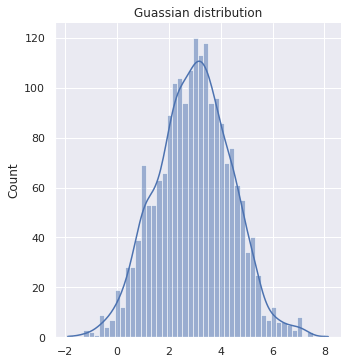

In [74]:
sns.displot(guassian, kde=True, bins= 50)
plt.title('Guassian distribution')
plt.show()

In [128]:
guassian.mean()

3.0327041693402443

In [129]:
guassian.var()

2.0400336336624187

# Q5:

In [36]:
def p(x):
    """probability

    Args:
        x (float):
    """
    return np.sin(x**2/100) + 1/(np.cos(x**3/100)) + x**(-3)
p = np.vectorize(p)                      

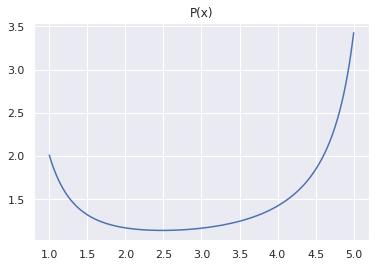

In [75]:
X = np.linspace(1,5,1000)
Prob = p(X)
w = Prob.max()
plt.plot(X, Prob)
plt.title("P(x)")
plt.show()

In [43]:
#generate random number from p(x) distrinution according to Von-Neumann alghorithm
XX = []
for i in range(10**5):
    x = np.random.uniform(1,5)
    y = np.random.uniform(0,w)
    P = p(x)
    if y <= P:
        XX.append(x)


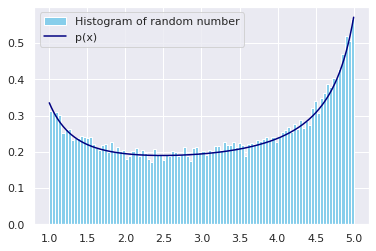

In [79]:
plt.hist(XX, bins=100, density=True, color="skyblue", label="Histogram of random number")
plt.plot(X, Prob/6, color="navy", label="p(x)")
plt.legend()
plt.show()

# Q8:

In [2]:
data = np.loadtxt("data.txt")
r = len(data)%100 
splited_data = np.array(np.array_split(data[r:], 100))  #for equal length

In [27]:
n = splited_data.shape[1]
C = np.zeros((n,n))
for i in range(n):
    for j in range(i+1):
        C[i,j] = np.mean(splited_data[:,i]*splited_data[:,j])
        C[j,i] = C[i,j]

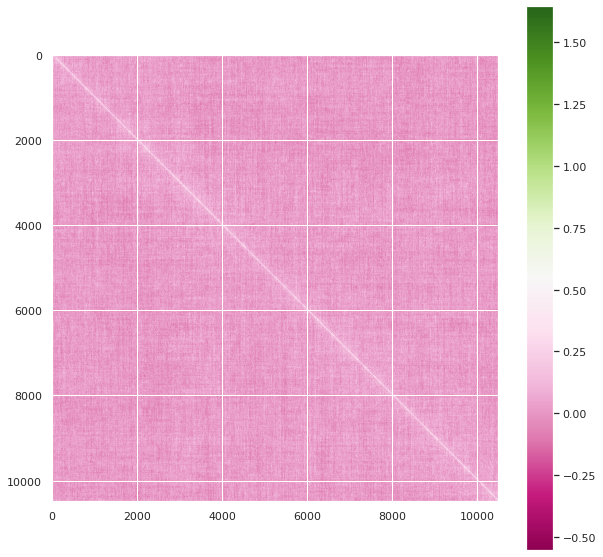

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(C, cmap="PiYG")
plt.colorbar()
plt.show()

In [40]:
c1, c2, c3, c4, c5 = np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
x1 = splited_data[93]
x2 = splited_data[34]
x3 = splited_data[18]
x4 = splited_data[40]
x5 = splited_data[88]

for tau in range(0,n):
    for i in range(n-tau):
        c1[tau] +=  x1[i]*x1[i+tau]
        c2[tau] +=  x2[i]*x2[i+tau]
        c3[tau] +=  x3[i]*x3[i+tau]
        c4[tau] +=  x4[i]*x4[i+tau]
        c5[tau] +=  x5[i]*x5[i+tau]
    c1[tau] /= n-tau
    c2[tau] /= n-tau
    c3[tau] /= n-tau
    c4[tau] /= n-tau
    c5[tau] /= n-tau

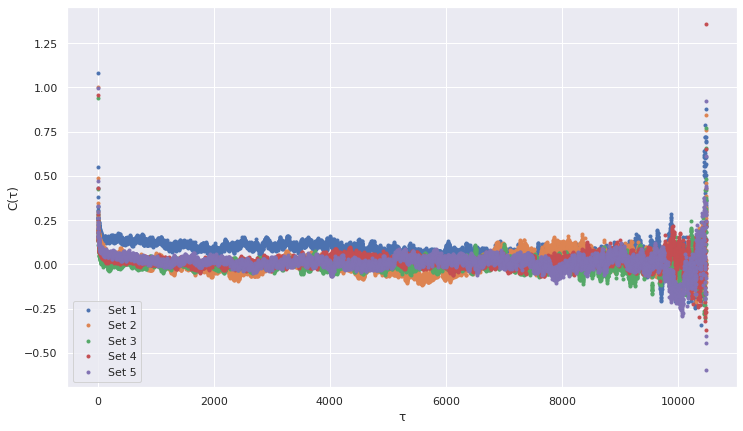

In [52]:
plt.figure(figsize=(12,7))
plt.plot(c1, label='Set 1', ls="", marker=".")
plt.plot(c2, label='Set 2', ls="", marker=".")
plt.plot(c3, label='Set 3', ls="", marker=".")
plt.plot(c4, label='Set 4', ls="", marker=".")
plt.plot(c5, label='Set 5', ls="", marker=".")
plt.xlabel('τ')
plt.ylabel('C(τ)')
plt.legend()
plt.show()

# Q9:

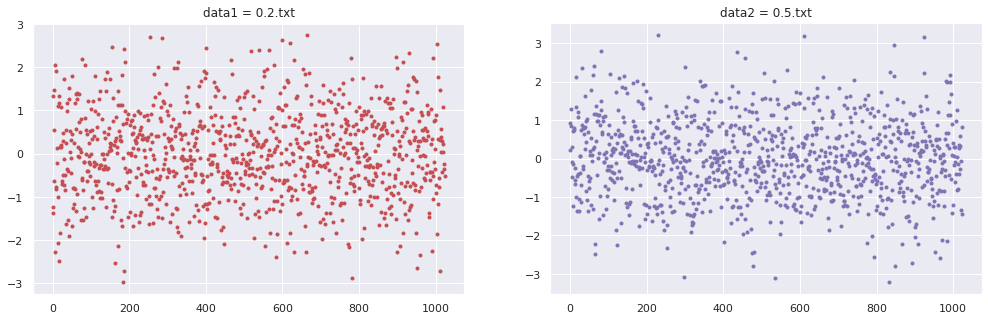

In [56]:
#plot the data
fig, axs = plt.subplots(1,2, figsize=(17,5))

axs[0].plot(data1, ".r", )
axs[0].set_title("data1 = 0.2.txt")

axs[1].plot(data2, ".m")
axs[1].set_title("data2 = 0.5.txt")

plt.show()

In [57]:
def pearson_coef(x,y):
    """calculate pearson coefficent

    Args:
        x (array_like): data
        y (array_like): data

    Returns:
        float: pearson coefficent
    """
    return np.mean((x-np.mean(x))* (y-np.mean(y))) / np.sqrt(np.var(x)*np.var(y))
    


In [63]:
print("The degree of correlation between 0.2.txt and 0.5.txt is", pearson_coef(data1,data2))
print("The degree of correlation between 0.2.txt and itself is", pearson_coef(data1,data1))
print("The degree of correlation between 0.5.txt and itself is", pearson_coef(data2,data2))

The degree of correlation between 0.2.txt and 0.5.txt is 0.0804956891229922
The degree of correlation between 0.2.txt and itself is 1.0
The degree of correlation between 0.5.txt and itself is 1.0


# Q10:

In [69]:
n = len(data1)
C1, C2, C3 = np.zeros(n), np.zeros(n), np.zeros(n)
for tau in range(0,n):
    for i in range(n-tau):
        C1[tau] +=  data1[i]*data1[i+tau]
        C2[tau] +=  data2[i]*data2[i+tau]
        C3[tau] +=  data3[i]*data3[i+tau]

    C1[tau] /= n-tau
    C2[tau] /= n-tau
    C3[tau] /= n-tau

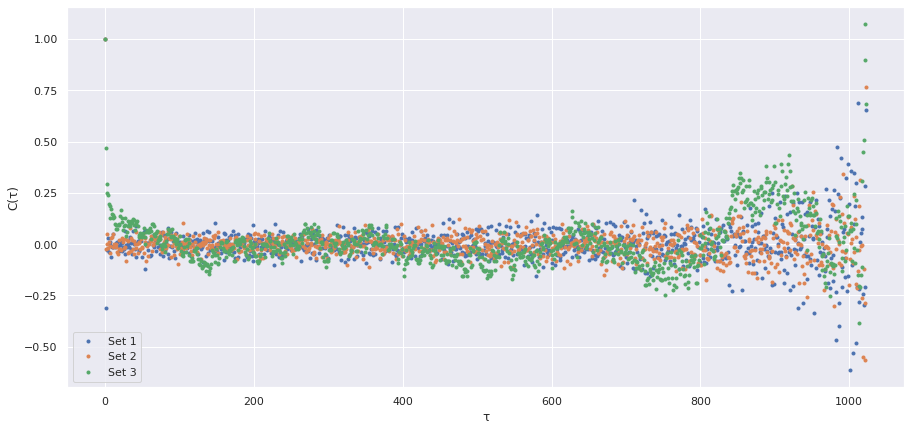

In [71]:
plt.figure(figsize=(15,7))
plt.plot(C1, label='Set 1', ls="", marker=".")
plt.plot(C2, label='Set 2', ls="", marker=".")
plt.plot(C3, label='Set 3', ls="", marker=".")

plt.xlabel('τ')
plt.ylabel('C(τ)')
plt.legend()
plt.show()

For all three datasets, $C (\tau) $ is almost equal to zero. So they are uncorrelated.